In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
#print(check_output(["store.csv", "../input"]).decode("utf8"))
sales = pd.read_csv('store.csv') # load the dataset

In [3]:
sales.head(5)

,reps,product,qty,revenue,region
0,Chitra,Galaxy,2,155.10,West
1,Vijay,Jet,2,39.30,North
2,Mala,Beacon,3,74.25,West
3,Suman,Alpen,3,100.98,North
4,Rachna,Orbit,2,44.98,North


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
reps       10000 non-null object
product    10000 non-null object
qty        10000 non-null int64
revenue    10000 non-null float64
region     10000 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 390.7+ KB


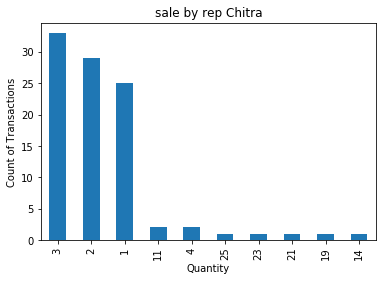

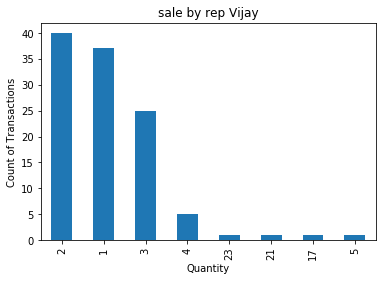

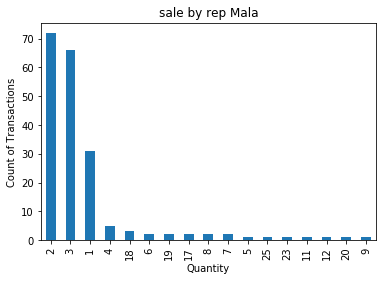

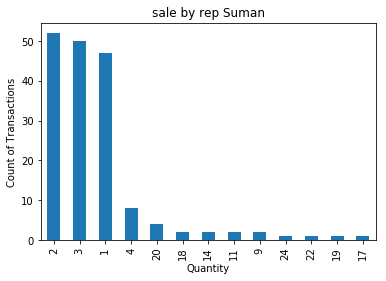

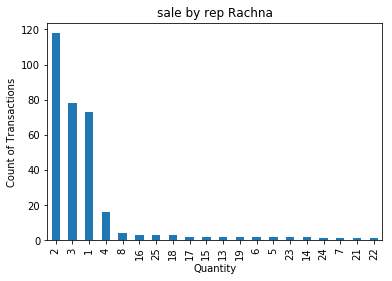

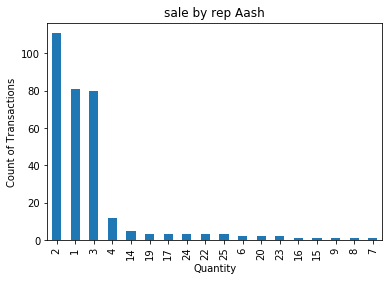

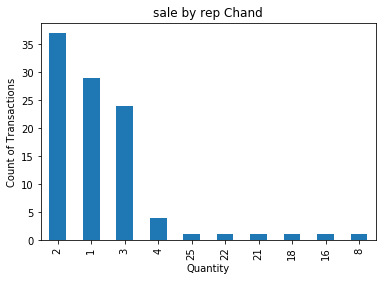

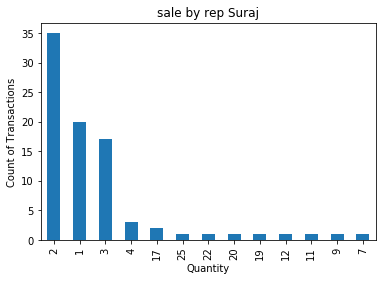

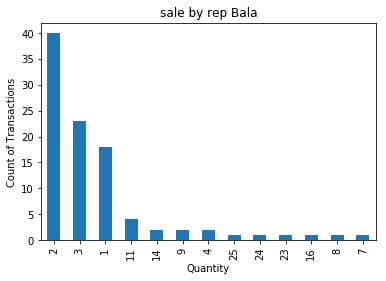

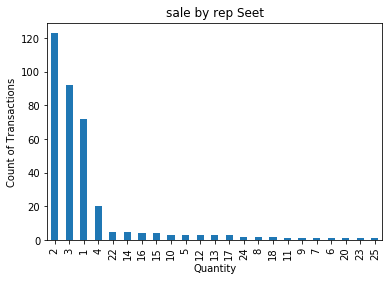

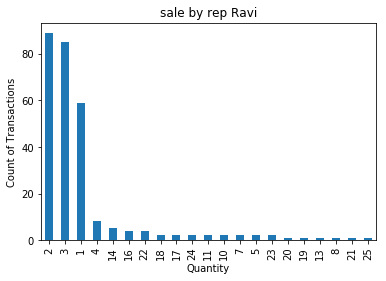

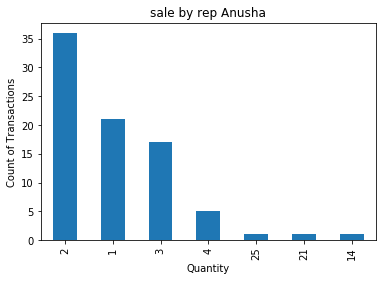

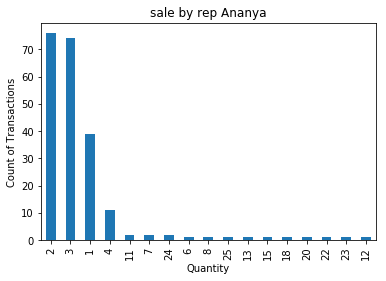

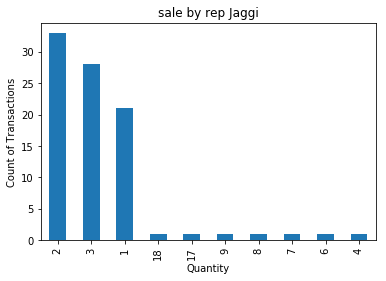

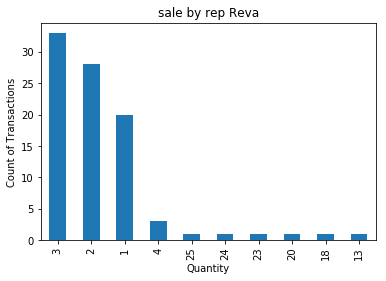

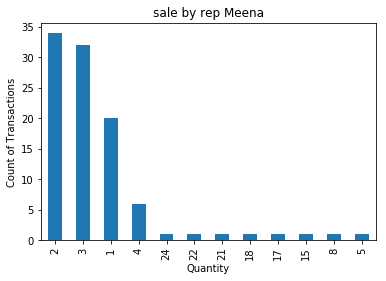

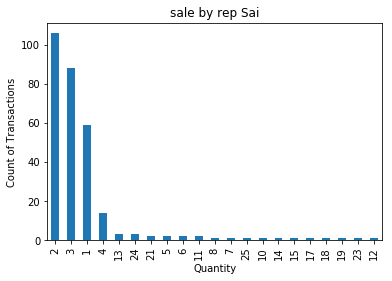

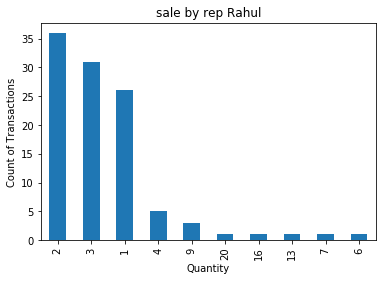

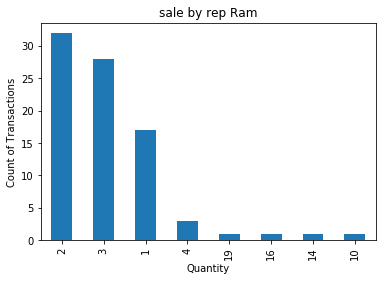

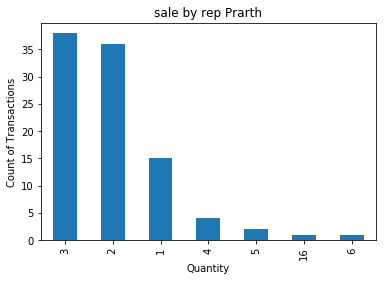

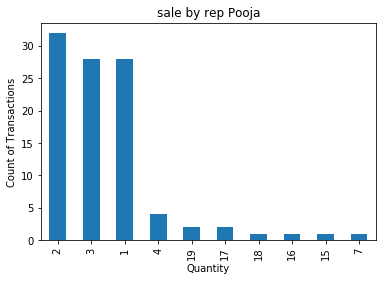

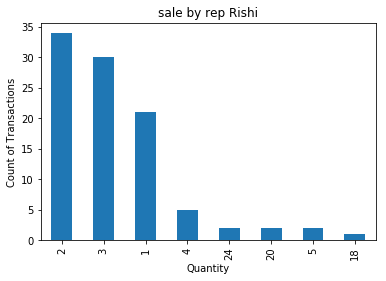

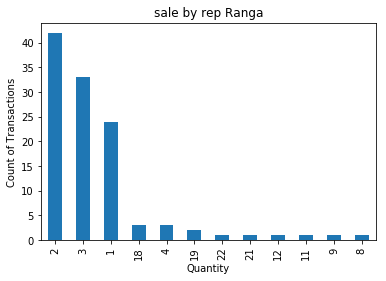

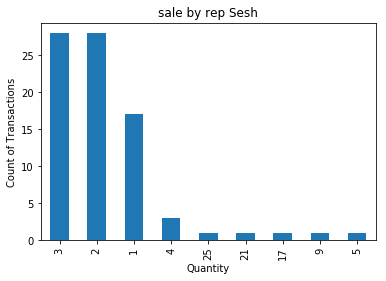

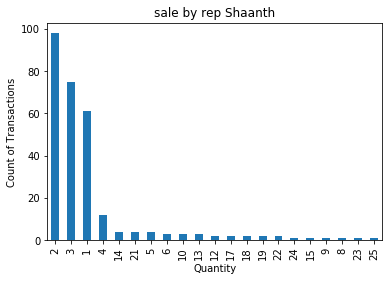

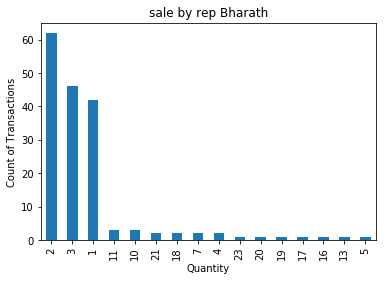

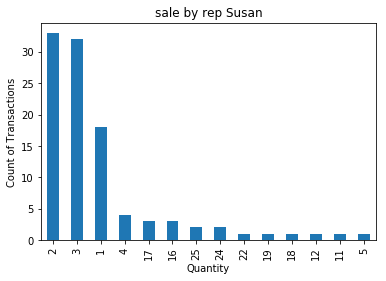

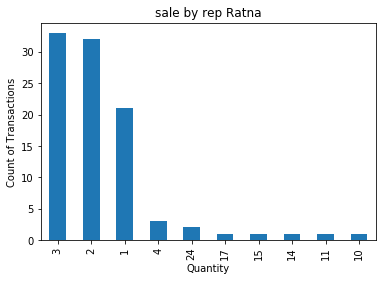

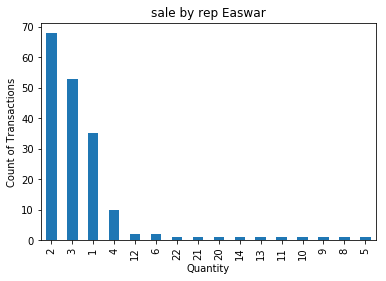

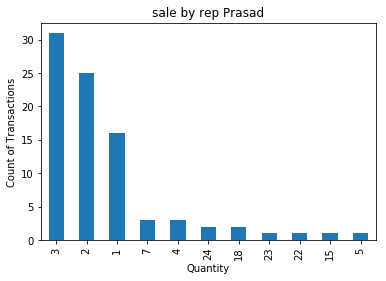

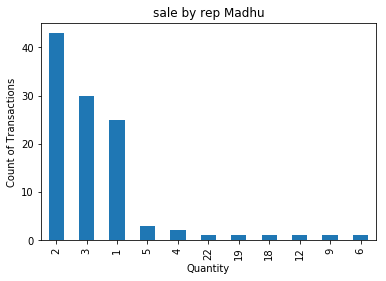

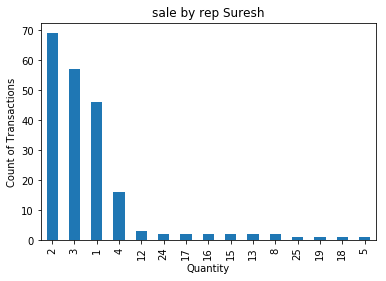

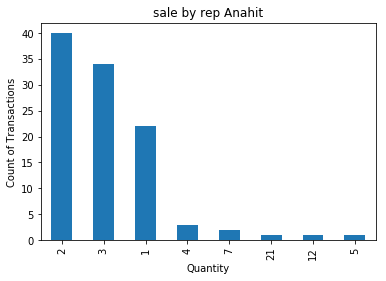

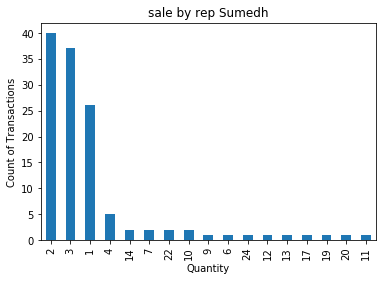

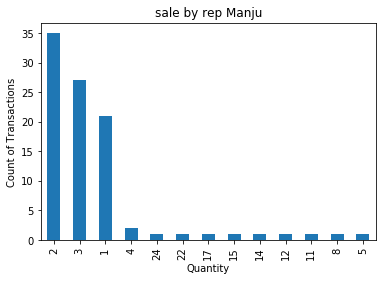

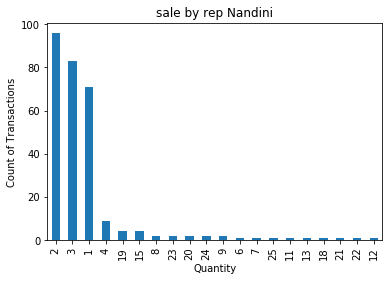

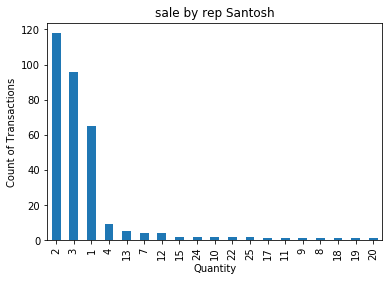

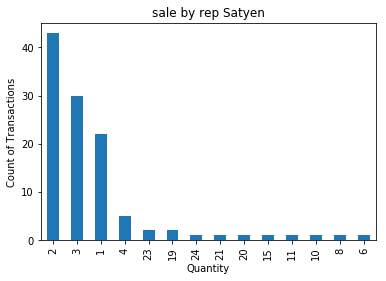

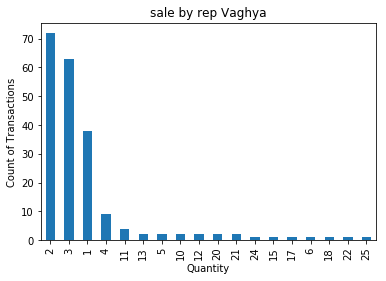

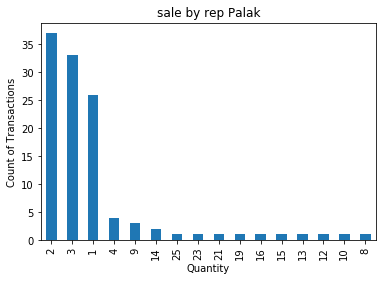

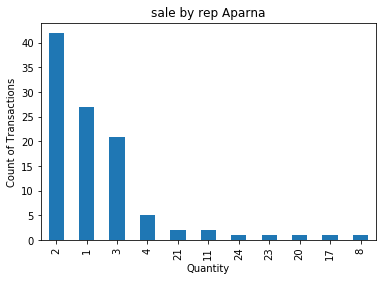

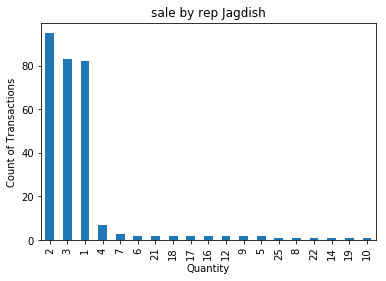

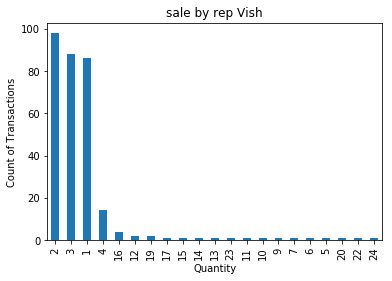

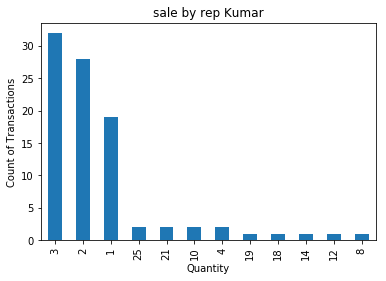

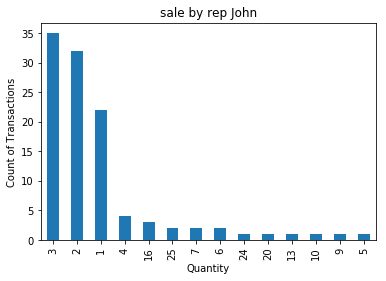

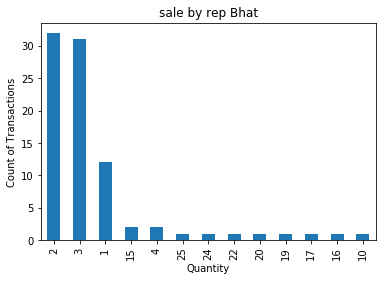

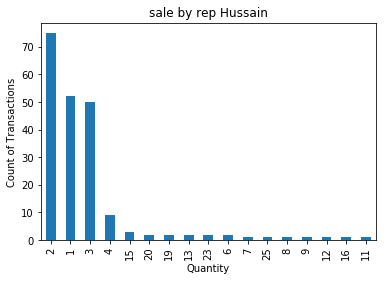

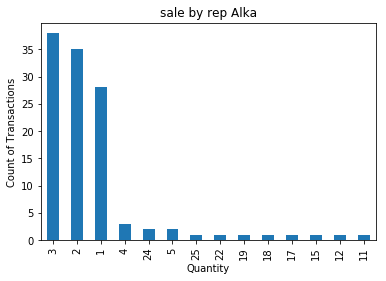

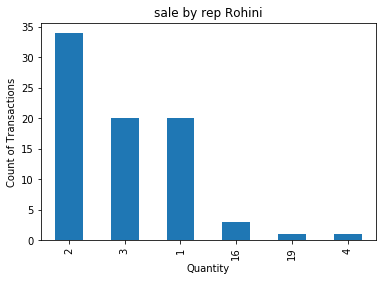

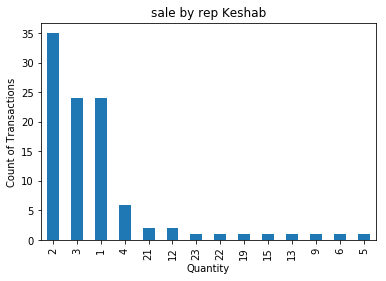

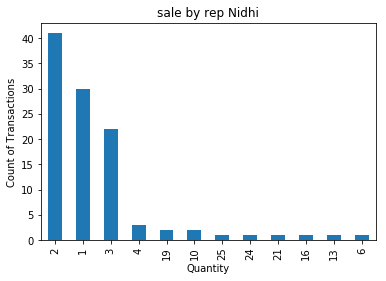

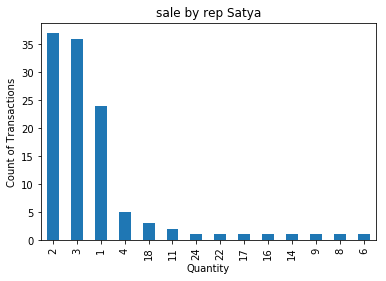

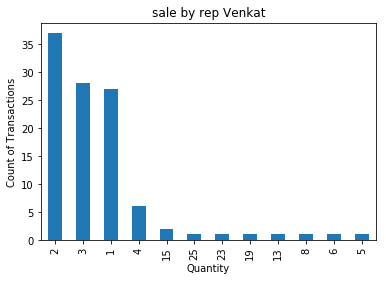

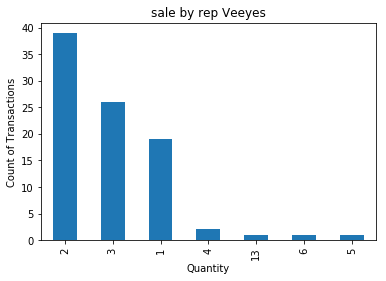

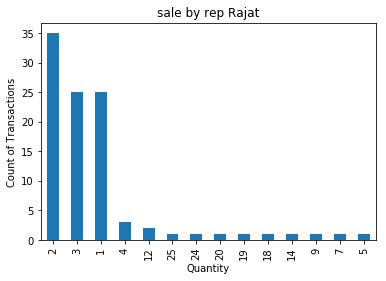

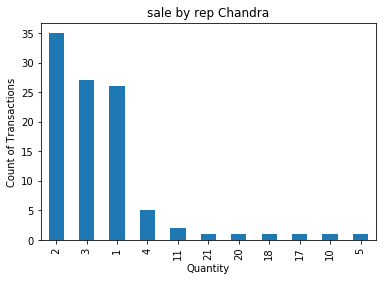

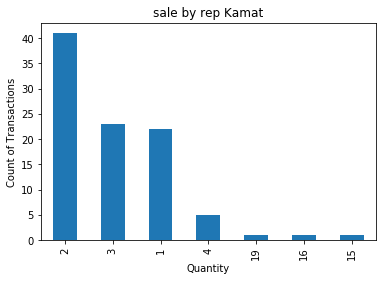

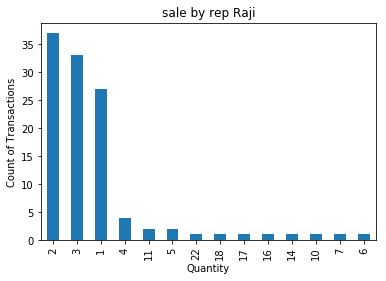

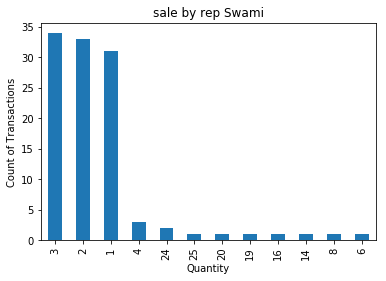

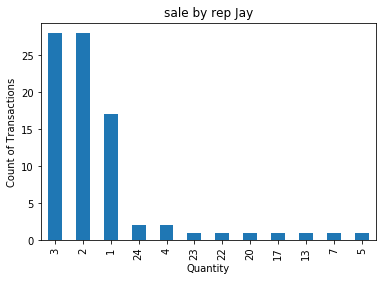

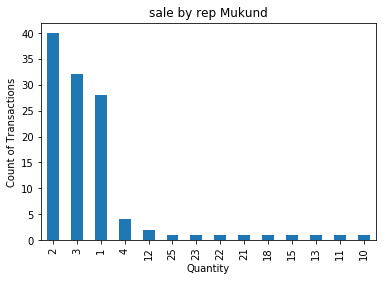

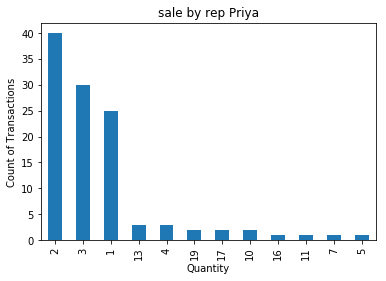

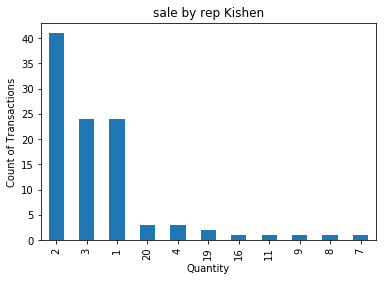

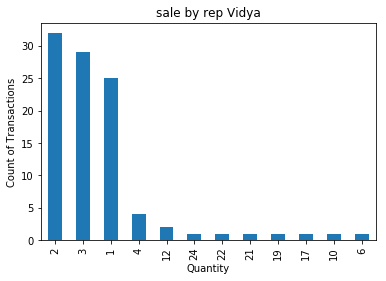

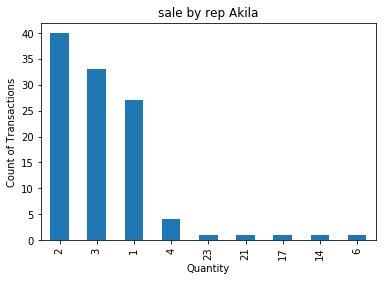

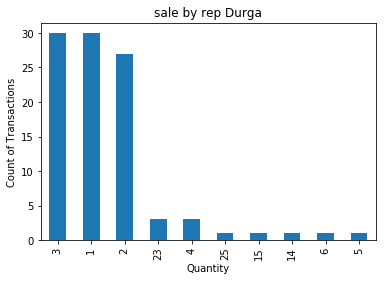

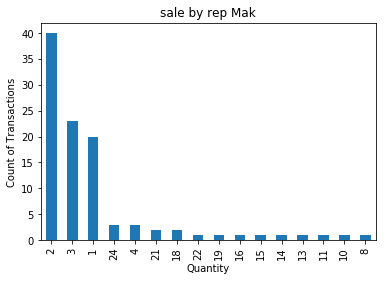

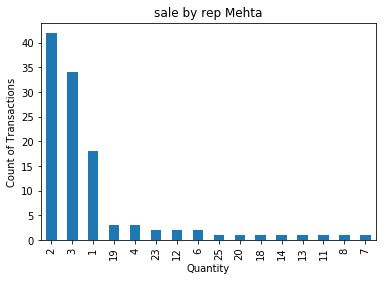

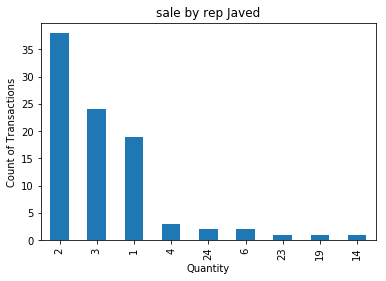

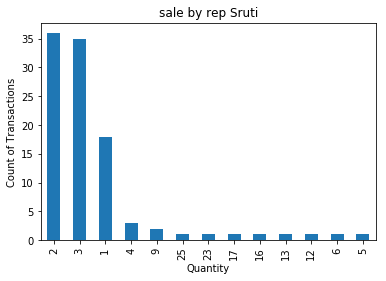

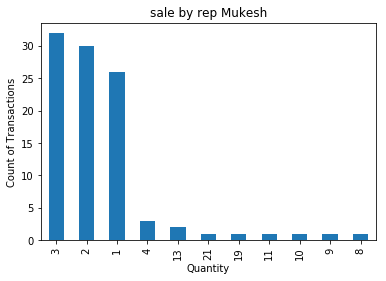

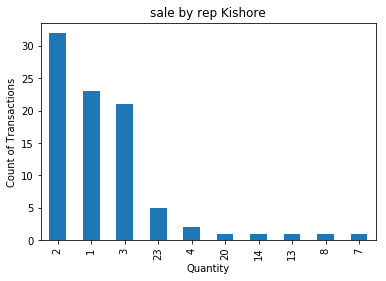

In [8]:
for i in sales.reps.unique().tolist(): 
    gb = sales.groupby(['reps'])
    gb.get_group(i).head(10)
    seet = gb.get_group(i).qty
    seet.value_counts().plot(kind='bar')
    plt.xlabel('Quantity')
    plt.ylabel('Count of Transactions')
    plt.title('sale by rep ' + i)
    plt.show()

Clustering Algorithms used here are:
* Hierarchical clustering
* KMeans

In [22]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from pylab import rcParams
import seaborn as sb
import sklearn.metrics as sm

In [23]:
sales_tr = pd.read_excel('sales by State.xlsx')

In [24]:
sales_tr.columns

Index(['State', 'YTD 2018 POS Sales', 'Store Cnt'], dtype='object')

In [26]:
X_s = sales_tr[['YTD 2018 POS Sales','Store Cnt']].values

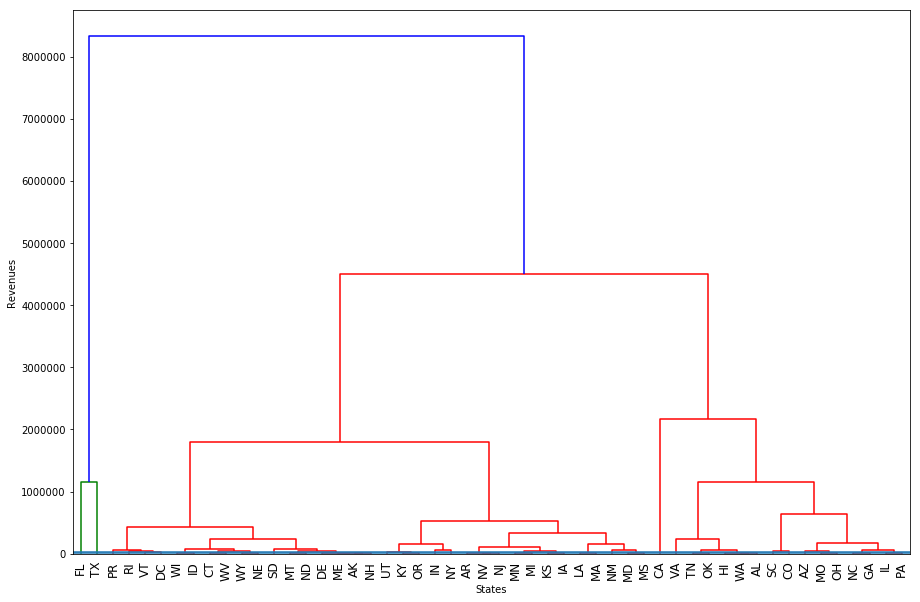

In [29]:
labelist = sales_tr['State'].tolist()
fig = plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X_s, method = 'ward'),leaf_font_size=12,leaf_rotation=90, labels=labelist)
plt.axhline(y=10000)
plt.axhline(y=30000)
plt.xlabel('States')
plt.ylabel('Revenues')

In [30]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
hc = AgglomerativeClustering(n_clusters= 5, affinity= 'euclidean',linkage='ward')

In [31]:
y_hc = hc.fit_predict(X_s)
y_hc1 = pd.DataFrame(y_hc)

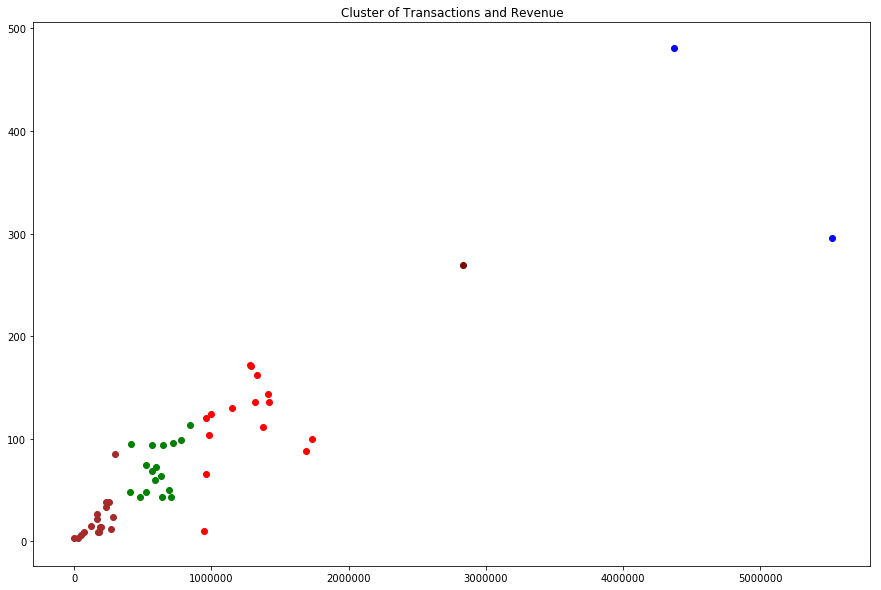

In [32]:
fig = plt.figure(figsize=(15,10))
plt.scatter(X_s[y_hc == 0,0], X_s[y_hc == 0,1],  c ='red', label='Cluster 1')
plt.scatter(X_s[y_hc == 1,0], X_s[y_hc == 1,1],  c ='blue', label='Cluster 2')
plt.scatter(X_s[y_hc == 2,0], X_s[y_hc == 2,1],  c ='green', label='Cluster 3')
plt.scatter(X_s[y_hc == 3,0], X_s[y_hc == 3,1],  c ='maroon', label='Cluster 4')
plt.scatter(X_s[y_hc == 4,0], X_s[y_hc == 4,1],  c ='brown', label='Cluster 5')
plt.title('Cluster of store cnt and Revenue')

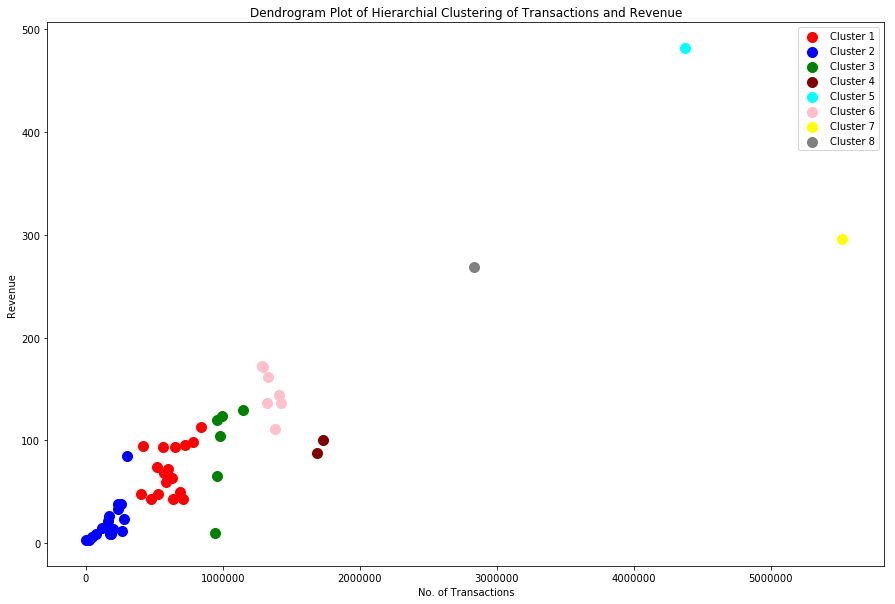

In [33]:
hc = AgglomerativeClustering(n_clusters= 8, affinity= 'euclidean',linkage='ward')
y_hc = hc.fit_predict(X_s)
fig = plt.figure(figsize=(15,10))
plt.scatter(X_s[y_hc == 0,0], X_s[y_hc == 0,1], s=100, c ='red', label='Cluster 1')
plt.scatter(X_s[y_hc == 1,0], X_s[y_hc == 1,1], s=100, c ='blue', label='Cluster 2')
plt.scatter(X_s[y_hc == 2,0], X_s[y_hc == 2,1], s=100, c ='green', label='Cluster 3')
plt.scatter(X_s[y_hc == 3,0], X_s[y_hc == 3,1], s=100, c ='maroon', label='Cluster 4')
plt.scatter(X_s[y_hc == 4,0], X_s[y_hc == 4,1], s=100, c ='cyan', label='Cluster 5')
plt.scatter(X_s[y_hc == 5,0], X_s[y_hc == 5,1], s=100, c ='pink', label='Cluster 6')
plt.scatter(X_s[y_hc == 6,0], X_s[y_hc == 6,1], s=100, c ='yellow', label='Cluster 7')
plt.scatter(X_s[y_hc == 7,0], X_s[y_hc == 7,1], s=100, c ='gray', label='Cluster 8')

plt.title('Dendrogram Plot of Hierarchial Clustering of Transactions and Revenue')
plt.xlabel('No. of Transactions')
plt.ylabel('Revenue')
plt.legend()
plt.show();